# CUSTOMER SEGMENTATION ANALYSIS
###### *Goal :- Segment customers based on RFM features using KMeans clustering.*

In [2]:
# Optional code block
# to check/change the working directory on my PC

import os 
# Confirm current working directory
print(os.getcwd())
# to change the working directory on my PC
os.chdir("C:/Users/oyeor/Documents/GitHub/customer-segmentation-analysis")

C:\Users\oyeor\Documents\GitHub\customer-segmentation-analysis


## 1.0 Load The RFM Data
###### *We start with Recency, Frequency, and Monetary scores already engineered.*

In [3]:
import pandas as pd

rfm = pd.read_csv("data/processed/rfm_metrics.csv")
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12747,1,11,4196.01
2,12748,0,209,33719.73
3,12749,3,5,4090.88
4,12820,2,4,942.34


In [4]:
# Quick check 

rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,91.208418,4.246429,1864.385601
std,1576.594671,99.533854,7.199202,7482.817477
min,12346.000000,0.000000,1.000000,3.750000
25%,14208.750000,17.000000,1.000000,300.280000
50%,15569.500000,50.000000,2.000000,652.280000
75%,16913.250000,142.000000,5.000000,1576.585000
max,18287.000000,373.000000,209.000000,259657.300000


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Recency'}>],
       [<Axes: title={'center': 'Frequency'}>,
        <Axes: title={'center': 'Monetary'}>]], dtype=object)

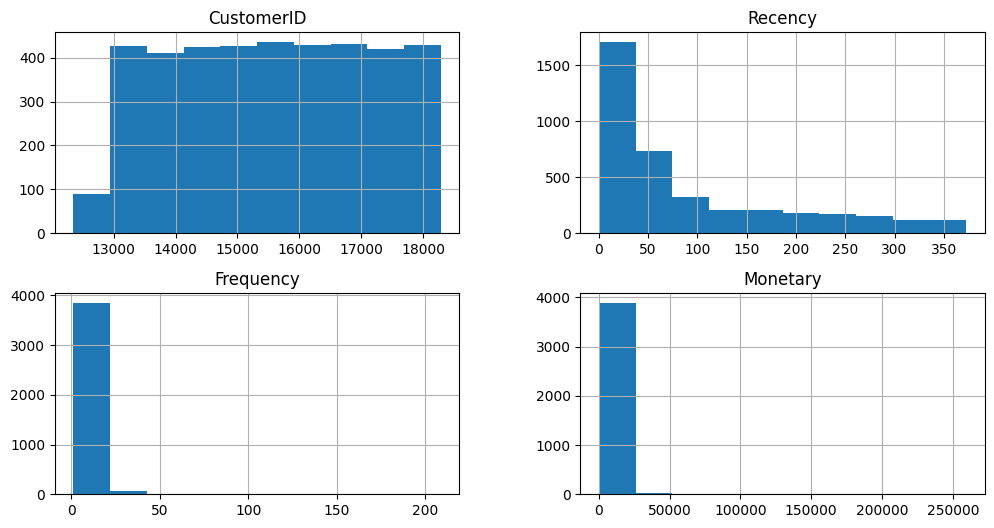

In [5]:
# Quick visual to give a feel of the rfm data distribution(skew)

rfm.hist(figsize = (12,6))

###### *The data is observed to be skewed to the right in some columns(Recency, Frequency & Monetary) which could function as an outlier*

## 2.0. Normalize Features
###### *KMeans uses Euclidean distance, so we must scale features otherwise a large Monetary Value(Skewed) for example would dominate i.e KMeans requires standardized data since it’s distance-based.*

In [8]:
# Install library and import module

!pip install -q scikit-learn
from sklearn.preprocessing import StandardScaler


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Copy for clustering
rfm_clustering = rfm[["Recency", "Frequency", "Monetary"]]

# Scale using Scaler 
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clustering)

# We use StandardScaler because it centers the data (mean = 0, std = 1)
# ... thereby making all features comparable.

## 3.0. Find The Optimal K (Using the Elbow Method)
###### *We use the Wthin-Cluster sum of squares(WCSS) to find the point where more clusters don't improve things much i.e to determine the optimal number of customer segments.*

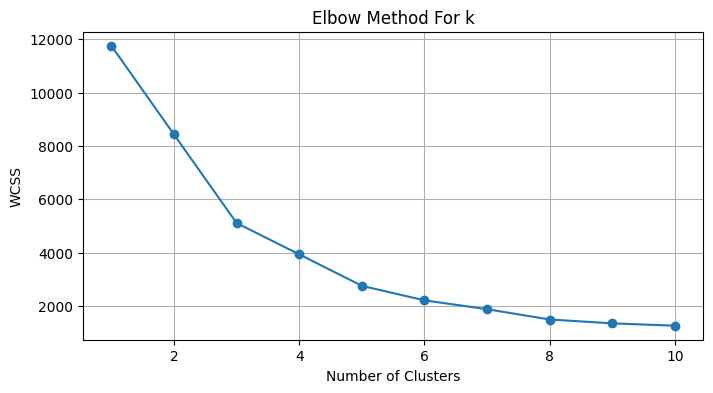

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Try k from 1 to 10
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = "auto")
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)   # inertia = WCSS

# Plot
plt.figure(figsize = (8,4))
plt.plot(range(1,11), wcss, marker = "o")
plt.title("Elbow Method For k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

## 4.0. Fit Kmeans Model
###### *We apply KMeans with the chosen `k` and assign each customer a segment.*

In [14]:
# Fit KMeans

kmeans = KMeans(n_clusters = 4, random_state = 42, n_init = "auto")
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

In [15]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346,325,1,77183.60,2
1,12747,1,11,4196.01,3
2,12748,0,209,33719.73,2
3,12749,3,5,4090.88,1
4,12820,2,4,942.34,1


## 5.0 Profile the Segments
###### *Group customers by their assigned cluster and inspect behavior*

In [18]:
rfm.groupby("Cluster").agg({
    "Recency" : "mean",
    "Frequency" : "mean",
    "Monetary" : "mean",
    "CustomerID" : "count"
}).rename(columns = {"CustomerID" : "NumCustomers"}).round(1)

,Recency,Frequency,Monetary,NumCustomers
Cluster,,,,
0,246.0,1.6,437.9,963
1,43.8,3.3,1139.5,2645
2,18.4,59.9,71494.4,23
3,15.6,17.2,7710.3,289


Cluster profile summary after clustering customers using their Recency, Frequency, and Monetary scores, four clear groups emerged : 
* Cluster 0 – Dormant or At-Risk Customers
These customers haven’t made a purchase in a long time and they don’t spend much either. They’re likely inactive or have already churned. Re-engagement campaigns might help, but they may also be a lower priority.

* Cluster 1 – Occasional / Average Shoppers
This is the largest group. They buy now and then, spend a modest amount, and aren't very frequent. They’re stable but not particularly valuable yet — with the right promotions, there’s potential to turn some of them into more loyal customers.


* Cluster 2 – VIP / Power Customers
This group is tiny, but incredibly valuable. They buy very often and spend a huge amount. These are the top 1%—it’s critical to keep them happy with special offers, personalized service, or loyalty perks.


* Cluster 3 – Loyal / High-Value Customers
They’re active, frequent buyers who spend a lot — not quite VIP level, but still very important. This group is larger than the VIPs and makes up a strong core of repeat customers. Definitely worth retaining and rewarding.

In summary, this segmentation helps us take action:
* Try to win back the dormant group
* Encourage occasional shoppers to engage more
* Protect and reward the VIPs and loyal customers 

## 6.0 Save Results
###### *We export this data for use in Power BI and and further insights*

In [20]:
# Save the rfm with clusters data

rfm.to_csv('data/processed/rfm_with_clusters.csv', index=False)

In [24]:
# segment/label the customers

rfm["Segment"] = rfm["Cluster"].map({
    0 : "Churn Risk",
    1 : "Potential Loyalist",
    2 : "Champion",
    3 : "Loyal"
})

# quick view of the data

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346,325,1,77183.60,2,Champion
1,12747,1,11,4196.01,3,Loyal
2,12748,0,209,33719.73,2,Champion
3,12749,3,5,4090.88,1,Potential Loyalist
4,12820,2,4,942.34,1,Potential Loyalist


In [25]:
# Save the rfm with segments data for power BI

rfm.to_csv("data/processed/rfm_with_segments.csv", index = False)

In [32]:
# This is to confirm KPI card in Power BI
rfm_summary = rfm.agg({
    "Recency" : "mean",
    "Frequency" : "mean",
    "Monetary" : "mean"
}).round(2)

print(rfm_summary)

Recency        91.21
Frequency       4.25
Monetary     1864.39
dtype: float64
